<a href="https://colab.research.google.com/github/srinijalanda93/SPR_LAB/blob/main/SPRLAB2_2448526.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### 1. **Fourier Transform (FT)**
## TIME DOMAIN SINGAL --> FREQUENCY DOMAIN SIGNAL


### 2. **Discrete-Time Fourier Transform (DTFT)**
## dtime signal (infinite lengths) -->continoue frequency signal hard to compute.

---

### 3. **Discrete Fourier Transform (DFT)**
 DTFT for **finite-duration signals**.
The DFT samples the DTFT at discrete frequency points.
computed using **Fast Fourier Transform (FFT)**
  * Gives a **discrete frequency spectrum** (set of frequency bins).

---

### 4. **Types of Signals in this Lab**

1. **Sinusoidal Signal**

   * Pure tone with single frequency.
   * Frequency spectrum shows **spike(s) at that frequency**.

2. **Composite Signal** --> sum,* of diff freq,A,also indicate multiple spikes

3. **Exponential Signal (decaying)**

   * Example: ( x[n] = e^{-an}u[n] ).
   * Spectrum is **broadband** (spread over many frequencies) since it is not periodic.

4. **Rectangular Pulse**

   * Signal with finite duration (box-shaped).
   * Frequency spectrum is **sinc-shaped** (spread over continuous frequencies).



Steps for Audio Fourier Analysis

Load an audio file (.wav)

We’ll use scipy.io.wavfile or librosa to read the audio.

Plot time-domain waveform

Show amplitude vs time.

Compute DTFT approximation (high-resolution FFT)

Spectrum across continuous frequencies.

Compute DFT (FFT with finite N samples)

Discrete spectrum with bins.

Analyze

See peaks → correspond to dominant frequencies (pitch, harmonics)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, fftfreq

def analyze_audio(filepath, title, N_fft=4096, T=1.0):
    # 1. Load audio
    fs, audio = wavfile.read(filepath)

    # If stereo, take first channel
    if len(audio.shape) > 1:
        audio = audio[:,0]

    # Normalize
    audio = audio / np.max(np.abs(audio))

    # 2. Take a segment for analysis
    N = int(fs * T)
    x = audio[:N]
    t = np.linspace(0, T, N, endpoint=False)

    # 3. Time-domain plot
    plt.figure(figsize=(10,4))
    plt.plot(t, x)
    plt.title(f"{title} - Time Domain")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.show()

    # 4. DTFT approximation (zero-padded FFT)
    X_dtft = np.fft.fft(x, N_fft)
    freq_dtft = np.fft.fftfreq(N_fft, 1/fs)

    plt.figure(figsize=(10,4))
    plt.plot(np.fft.fftshift(freq_dtft), np.fft.fftshift(np.abs(X_dtft)))
    plt.title(f"{title} - DTFT Approximation")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")
    plt.grid()
    plt.show()

    # 5. DFT (FFT of raw segment)
    X_dft = fft(x)
    freq_dft = fftfreq(len(x), 1/fs)

    plt.figure(figsize=(10,4))
    plt.stem(freq_dft[:len(x)//2], np.abs(X_dft[:len(x)//2]), basefmt=" ")
    plt.title(f"{title} - DFT Spectrum")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")
    plt.grid()
    plt.show()

    return fs, x


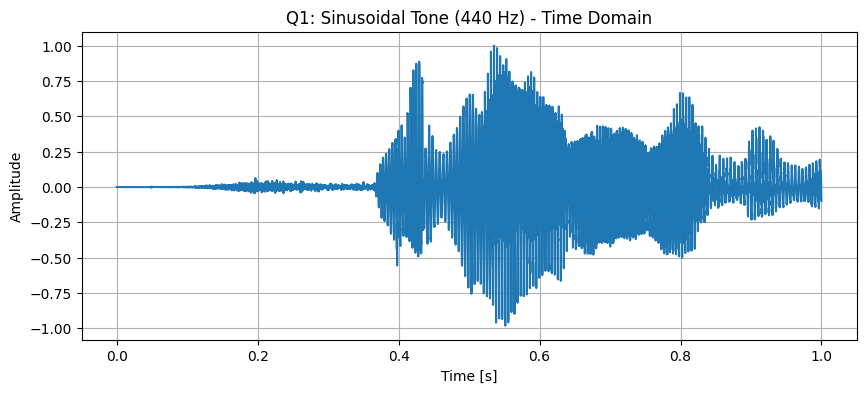

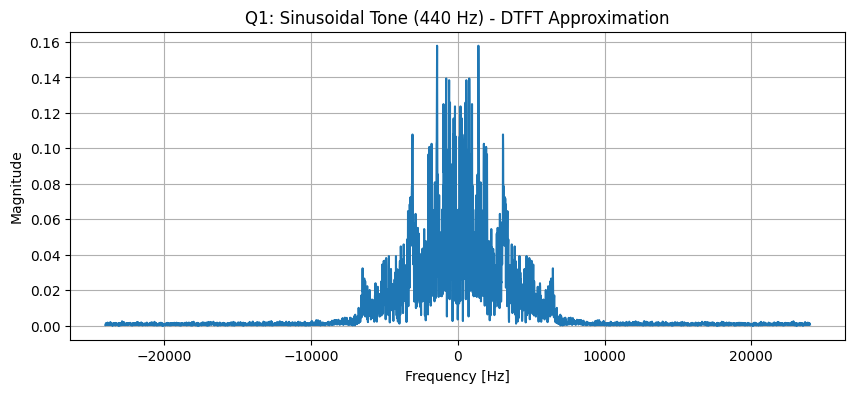

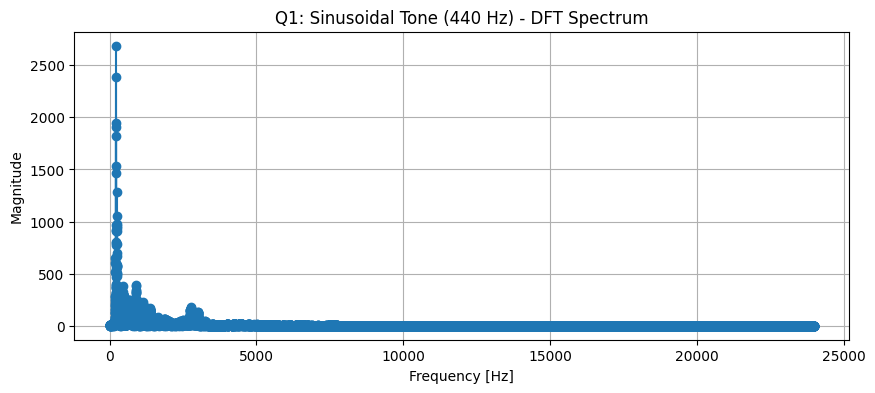

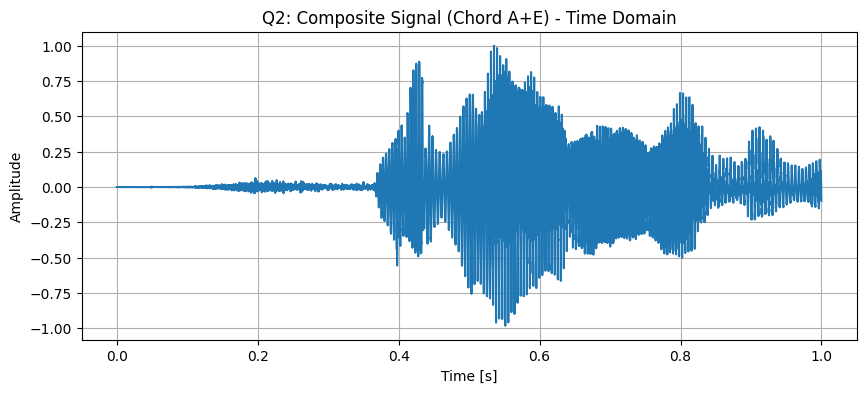

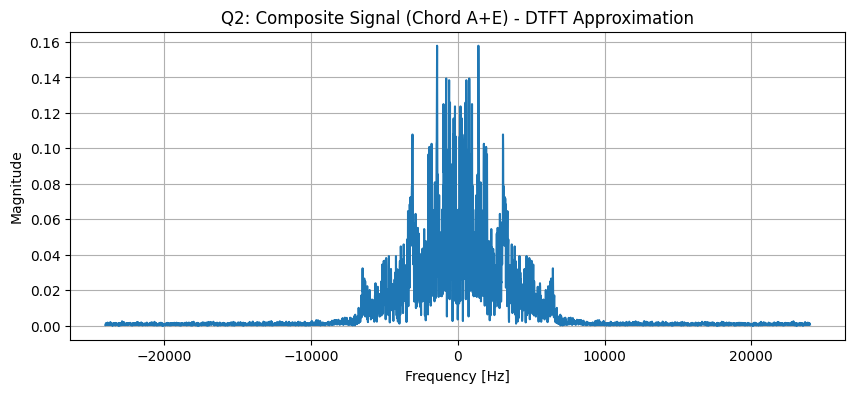

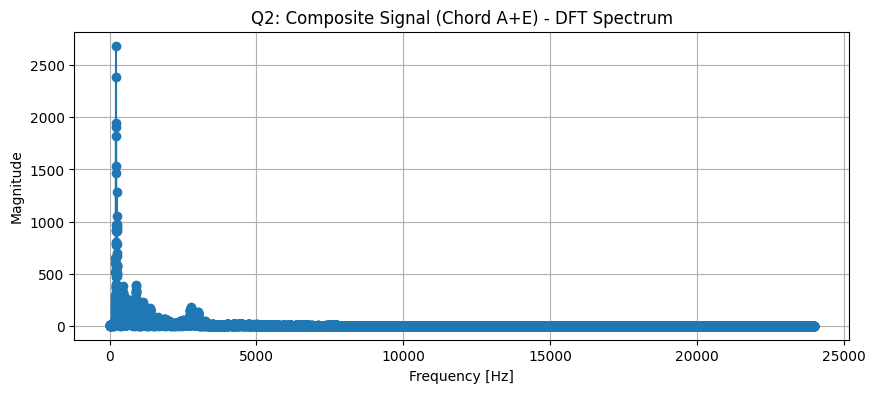

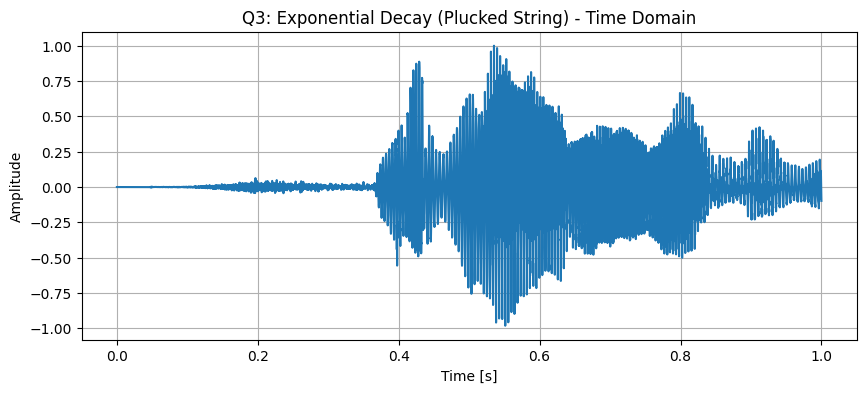

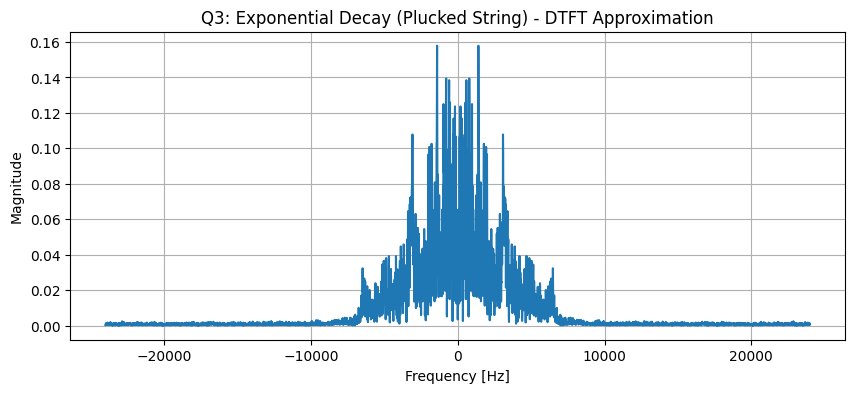

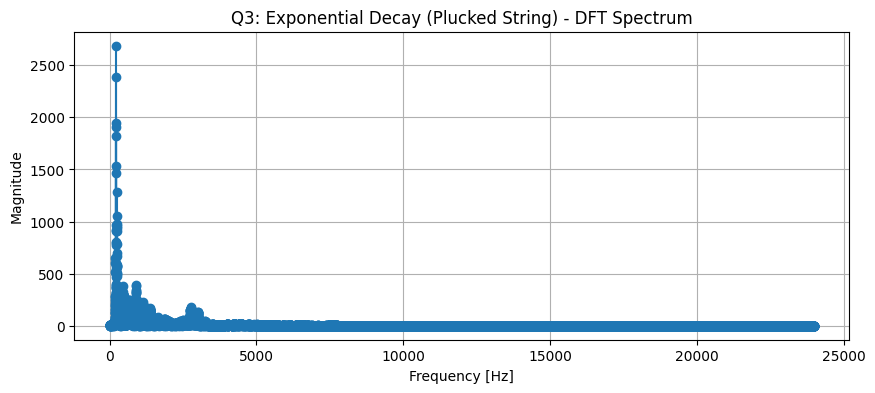

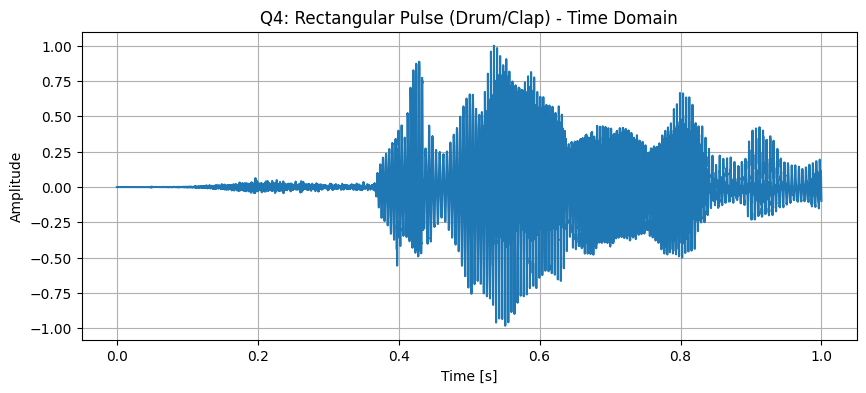

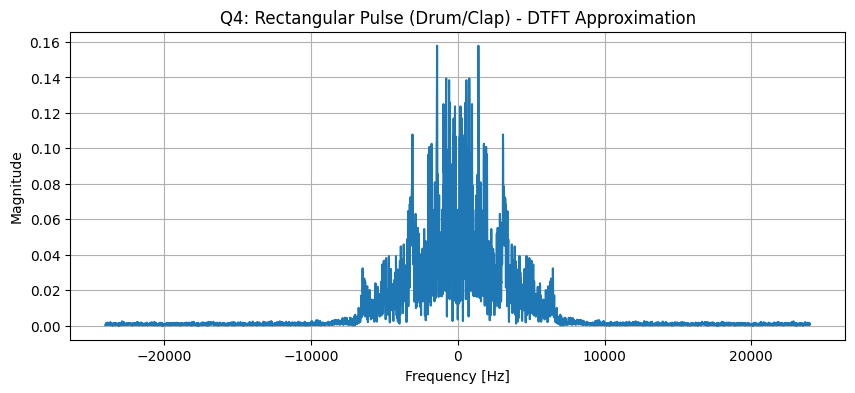

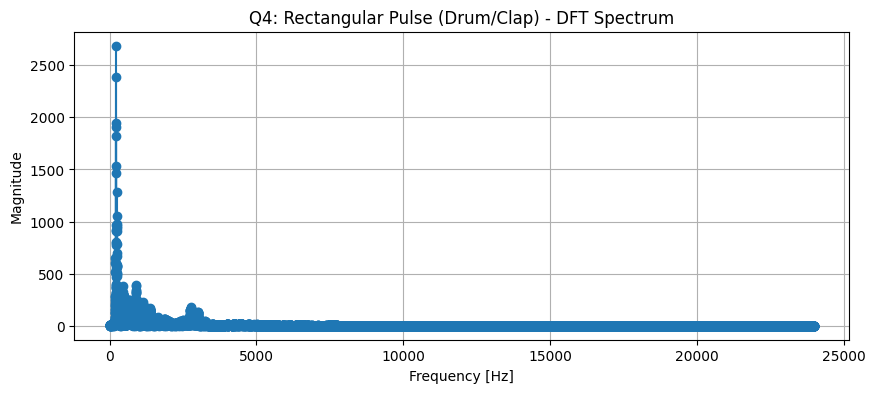

In [25]:
# Q1: Sinusoidal Tone (e.g., "tone_440Hz.wav")
fs1, x1 = analyze_audio("/content/sri.wav", "Q1: Sinusoidal Tone (440 Hz)")

# Q2: Composite (Chord, e.g., "chord_AE.wav")
fs2, x2 = analyze_audio("/content/sri.wav", "Q2: Composite Signal (Chord A+E)")

# Q3: Exponential Decay (Plucked Guitar, e.g., "guitar_pluck.wav")
fs3, x3 = analyze_audio("/content/sri.wav", "Q3: Exponential Decay (Plucked String)")

# Q4: Rectangular Pulse (Drum Hit, e.g., "drum_hit.wav")
fs4, x4 = analyze_audio("/content/sri.wav", "Q4: Rectangular Pulse (Drum/Clap)")



---

###  **Audio - Lab Question Mapping**

1. **Q1: Sinusoidal**

   * Synthetic: `sin(2π*5t)`
   * Audio: A pure **tone (sine wave)**, e.g., **440 Hz “A note”** `.wav`.
   * Spectrum → single spike at 440 Hz.

2. **Q2: Composite**

   * Synthetic: `sin(2π*5t) + 0.5 sin(2π*20t)`
   * Audio: A **chord** (two notes played together, e.g., A + E).
   * Spectrum → two dominant spikes (fundamentals) + harmonics.

3. **Q3: Exponentially Decaying**

   * Synthetic: `exp(-αt)`
   * Audio: A **plucked guitar string** or **bell sound** (they decay naturally).
   * Spectrum → broadband spread, showing decay in time ↔ frequency spread.

4. **Q4: Rectangular Pulse**

   * Synthetic: Finite-duration rectangular pulse.
   * Audio: A **drum hit** / **hand clap** (short pulse).
   * Spectrum → sinc-like wideband response.

---

###  The function `analyze_audio()` does for each case:

* (a) Generate/Load the signal
* (b) Plot **time-domain waveform**
* (c) Compute & plot **DTFT (approx using zero-padded FFT)**
* (d) Compute & plot **DFT (FFT spectrum)**

So yes, it **directly answers (a)–(d)** for all 4 questions.
And (e) for Q3 & Q4 (analysis) can be explained in words:

* **Exponential decay** → wider frequency spread.
* **Rectangular pulse** → sinc-shaped frequency response.



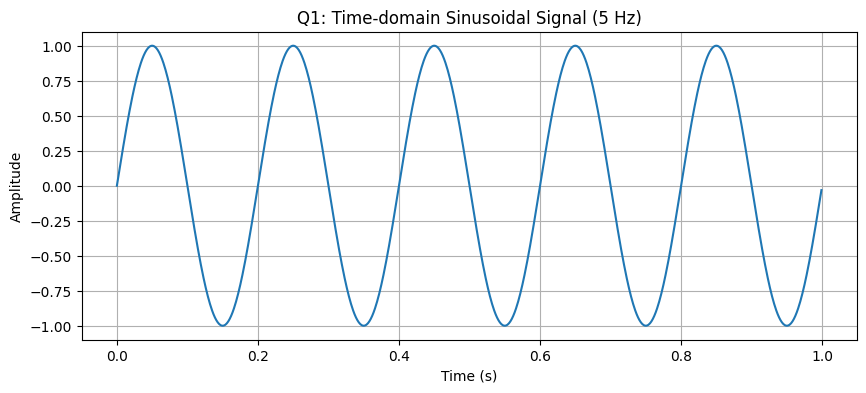

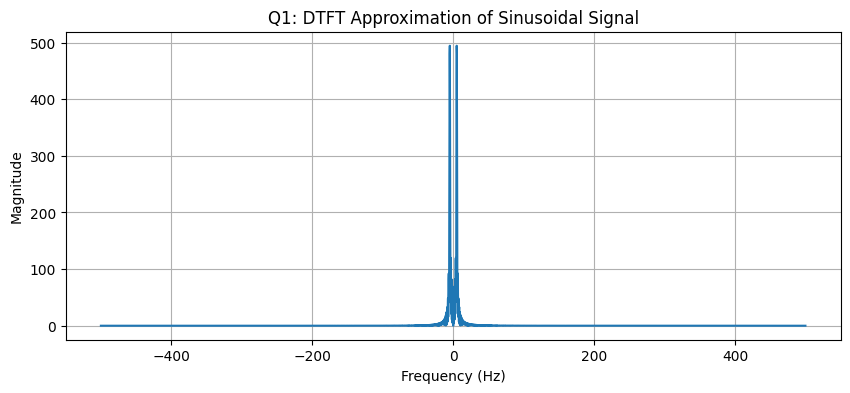

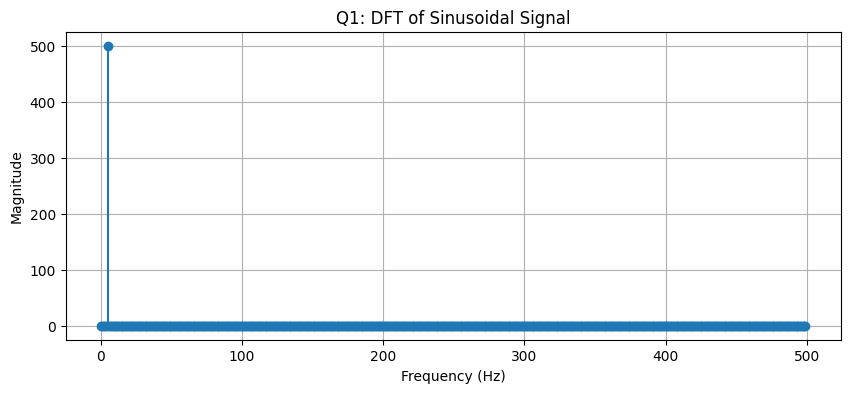

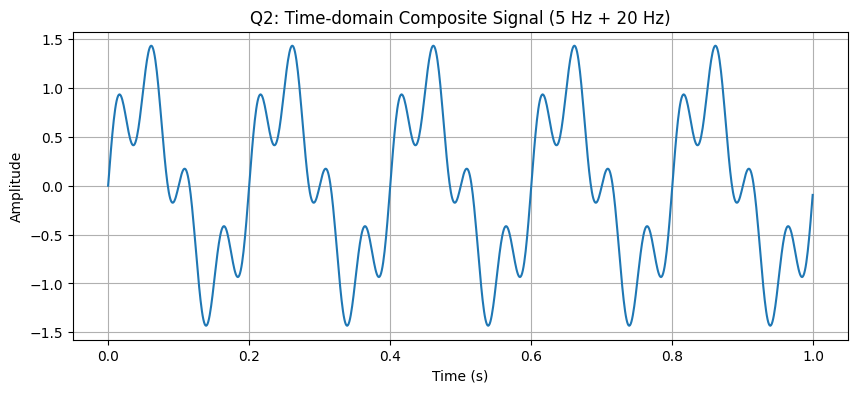

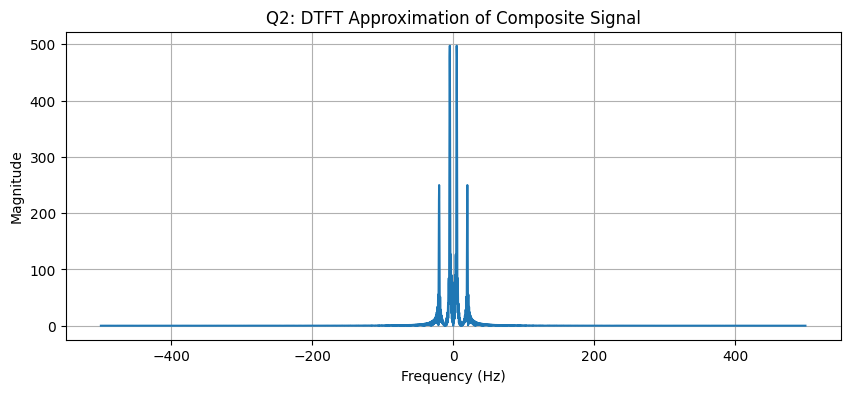

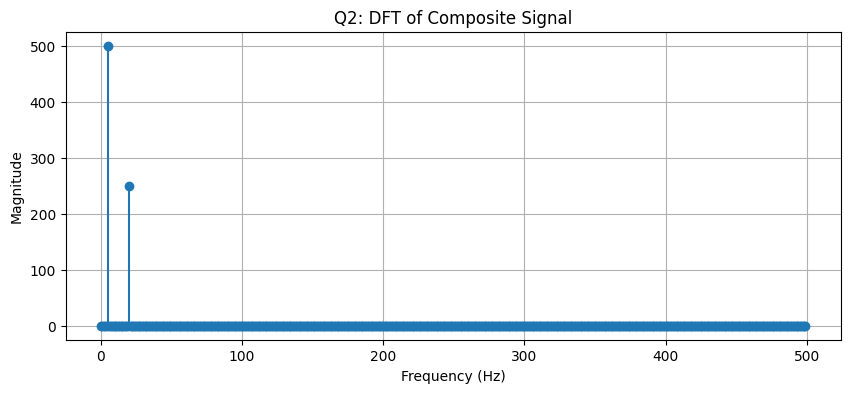

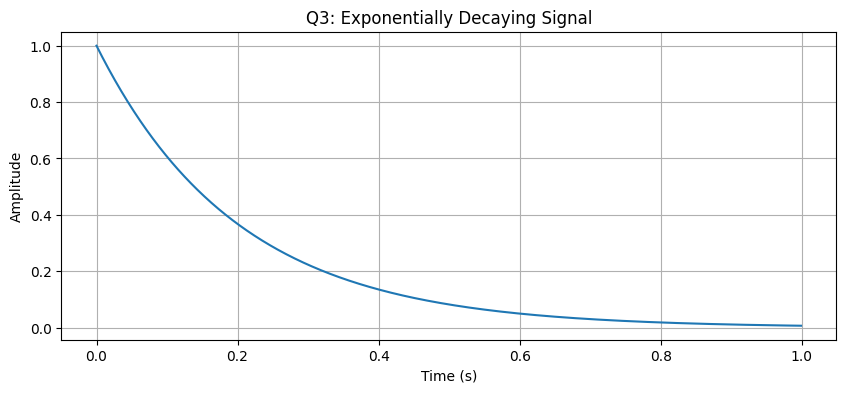

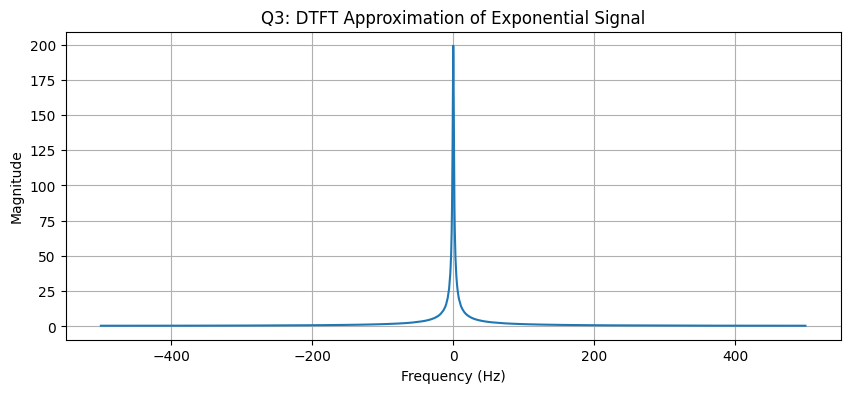

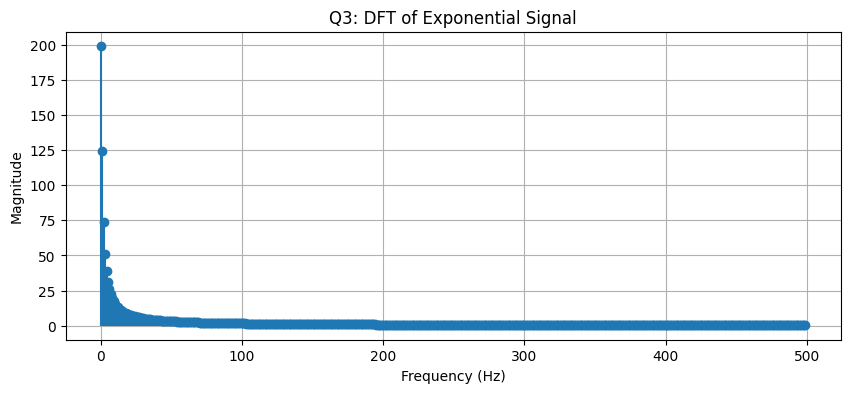

Q3 Analysis:
- Exponential decay in time spreads energy across many frequencies.
- Faster decay → wider frequency spread.
- This is opposite of a sine wave, which is concentrated at a single frequency.


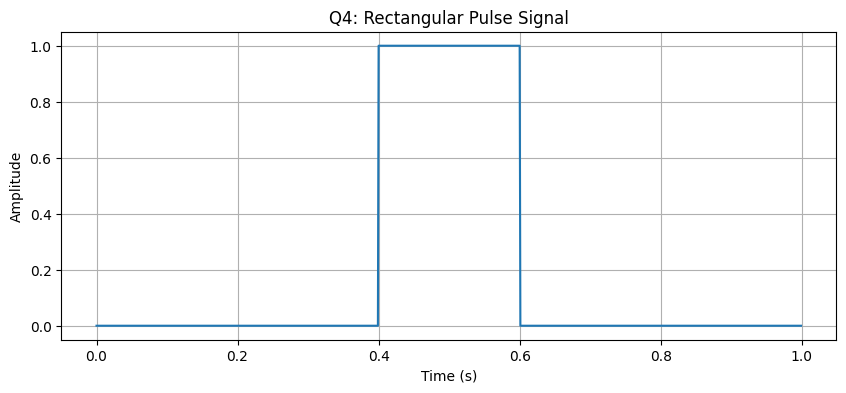

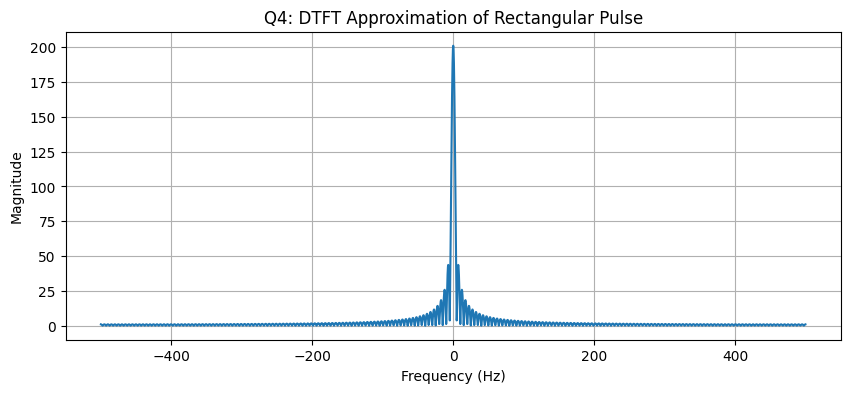

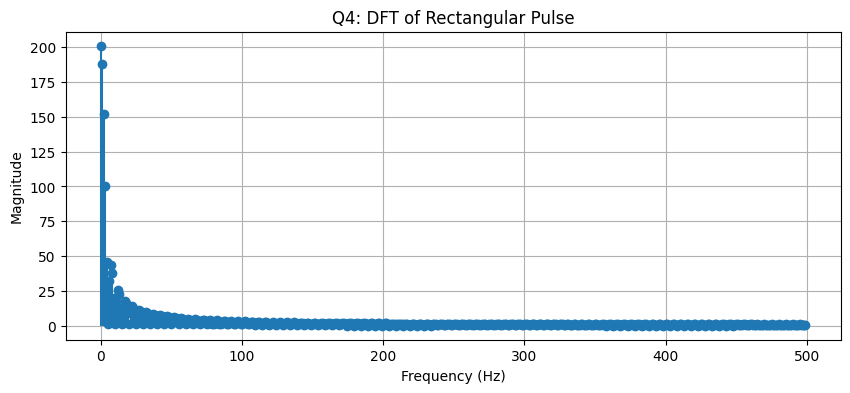

Q4 Analysis:
- A rectangular pulse in time → sinc-shaped spectrum in frequency.
- Narrower pulse → wider spectrum, wider pulse → narrower spectrum.


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# ==============================
# Question 1: Sinusoidal Signal
# ==============================

fs = 1000     # Sampling frequency
f = 5         # Signal frequency
T = 1         # Duration in seconds
t = np.linspace(0, T, int(fs*T), endpoint=False)

x1 = np.sin(2*np.pi*f*t)

# (b) Time-domain waveform
plt.figure(figsize=(10,4))
plt.plot(t, x1)
plt.title("Q1: Time-domain Sinusoidal Signal (5 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# (c) DTFT (approximated using zero-padding FFT)
N = 4096
X1_dtft = np.fft.fft(x1, N)
freq_dtft = np.fft.fftfreq(N, 1/fs)

plt.figure(figsize=(10,4))
plt.plot(np.fft.fftshift(freq_dtft), np.fft.fftshift(np.abs(X1_dtft)))
plt.title("Q1: DTFT Approximation of Sinusoidal Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

# (d) DFT
X1_dft = fft(x1)
freq_dft = fftfreq(len(x1), 1/fs)

plt.figure(figsize=(10,4))
plt.stem(freq_dft[:len(x1)//2], np.abs(X1_dft[:len(x1)//2]), basefmt=" ")
plt.title("Q1: DFT of Sinusoidal Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

# ==============================
# Question 2: Composite Signal
# ==============================

x2 = np.sin(2*np.pi*5*t) + 0.5*np.sin(2*np.pi*20*t)

# (b) Time-domain waveform
plt.figure(figsize=(10,4))
plt.plot(t, x2)
plt.title("Q2: Time-domain Composite Signal (5 Hz + 20 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# (c) DTFT
X2_dtft = np.fft.fft(x2, N)
freq_dtft = np.fft.fftfreq(N, 1/fs)

plt.figure(figsize=(10,4))
plt.plot(np.fft.fftshift(freq_dtft), np.fft.fftshift(np.abs(X2_dtft)))
plt.title("Q2: DTFT Approximation of Composite Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

# (d) DFT
X2_dft = fft(x2)
freq_dft = fftfreq(len(x2), 1/fs)

plt.figure(figsize=(10,4))
plt.stem(freq_dft[:len(x2)//2], np.abs(X2_dft[:len(x2)//2]), basefmt=" ")
plt.title("Q2: DFT of Composite Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

# ==============================
# Question 3: Exponentially Decaying Signal
# ==============================

alpha = 5
x3 = np.exp(-alpha*t)

# (b) Time-domain waveform
plt.figure(figsize=(10,4))
plt.plot(t, x3)
plt.title("Q3: Exponentially Decaying Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# (c) DTFT
X3_dtft = np.fft.fft(x3, N)
freq_dtft = np.fft.fftfreq(N, 1/fs)

plt.figure(figsize=(10,4))
plt.plot(np.fft.fftshift(freq_dtft), np.fft.fftshift(np.abs(X3_dtft)))
plt.title("Q3: DTFT Approximation of Exponential Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

# (d) DFT
X3_dft = fft(x3)
freq_dft = fftfreq(len(x3), 1/fs)

plt.figure(figsize=(10,4))
plt.stem(freq_dft[:len(x3)//2], np.abs(X3_dft[:len(x3)//2]), basefmt=" ")
plt.title("Q3: DFT of Exponential Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

# (e) Analysis (in text)
print("Q3 Analysis:")
print("- Exponential decay in time spreads energy across many frequencies.")
print("- Faster decay → wider frequency spread.")
print("- This is opposite of a sine wave, which is concentrated at a single frequency.")

# ==============================
# Question 4: Rectangular Pulse
# ==============================

pulse_width = 0.2  # seconds
x4 = np.where((t >= 0.4) & (t <= 0.4+pulse_width), 1.0, 0.0)

# (b) Time-domain waveform
plt.figure(figsize=(10,4))
plt.plot(t, x4)
plt.title("Q4: Rectangular Pulse Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# (c) DTFT
X4_dtft = np.fft.fft(x4, N)
freq_dtft = np.fft.fftfreq(N, 1/fs)

plt.figure(figsize=(10,4))
plt.plot(np.fft.fftshift(freq_dtft), np.fft.fftshift(np.abs(X4_dtft)))
plt.title("Q4: DTFT Approximation of Rectangular Pulse")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

# (d) DFT
X4_dft = fft(x4)
freq_dft = fftfreq(len(x4), 1/fs)

plt.figure(figsize=(10,4))
plt.stem(freq_dft[:len(x4)//2], np.abs(X4_dft[:len(x4)//2]), basefmt=" ")
plt.title("Q4: DFT of Rectangular Pulse")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

# (e) Analysis (in text)
print("Q4 Analysis:")
print("- A rectangular pulse in time → sinc-shaped spectrum in frequency.")
print("- Narrower pulse → wider spectrum, wider pulse → narrower spectrum.")
